This notebook builds on a Pyhton script from Peru calculating the FFT of a Fibonacci word.

It now contains various implementations including the Wassertein metric calculations on word sequences.

In [9]:
using PyPlot
using Statistics
using FFTW
using StatsPlots
using Plots
# using Interpolations
using Polynomials
using LsqFit
using Printf
# using ComplexRoots

In [10]:
# # ****************************** Sec 0 ******************************
# # Functions for different sequence generation methods

function normal_crystal_gen(N::Int, t::Float64)
    return fill(t, N)
end

function normal_crystal_alternating_gen(N::Int, t::Float64)
    sequence = Vector{Float64}(undef, N)
    for i in 1:N
        sequence[i] = (i % 2 == 1) ? t : -t
    end
    return sequence
end

function golden_ratio_sequence_gen(N::Int, t1::Float64, t2::Float64)
    sequence = "A"
    while length(sequence) < N
        sequence = replace(sequence, "A" => "AB", "B" => "A")
    end
    # println(sequence)
    
    number_sequence = [ch == 'A' ? t1 : t2 for ch in sequence]
    
    return number_sequence
end

function silver_ratio_sequence_gen(N::Int, t1::Float64, t2::Float64)
    sequence = "A"
    while length(sequence) < N
        sequence = replace(sequence, "A" => "BAA", "B" => "A")
    end
    # println(sequence)
    
    number_sequence = [ch == 'A' ? t1 : t2 for ch in sequence]
    
    return number_sequence
end

function check_PV_ratio(number_sequence::Vector{Float64})
    count_A = count(x -> x == 1, number_sequence)
    count_B = count(x -> x == 2, number_sequence)
    
    ratio = count_A / count_B
    
    return ratio
end

function thue_morse_sequence_gen(n::Int, t1::Float64, t2::Float64)
    if n <= 0 || (n & (n - 1)) != 0
        throw(ArgumentError("n must be a power of 2."))
    end
    
    sequence = Float64[]
    for i in 0:n-1
        num_ones = count(c -> c == '1', string(i, base=2))
        value = num_ones % 2 == 0 ? t1 : t2
        push!(sequence, value)
    end
    
    return sequence
end


function plastic_ratio_sequence_gen(N::Int, t1::Float64, t2::Float64, t3::Float64)
    sequence = "A"
    while length(sequence) < N
        sequence = replace(sequence, "A" => "B", "B" => "AC", "C" => "A") # Van der Laan word generation
        # sequence = replace(sequence, "A" => "AB", "B" => "AC", "C" => "A") # ChatGPT
    end
    # println(sequence)
    
    number_sequence = [ch == 'A' ? t1 : ch == 'B' ? t2 : t3 for ch in sequence]
    
    return number_sequence
end

function check_plastic_ratio(number_sequence::Vector{Float64}, rho::Float64)
    count_A = count(x -> x == 1, number_sequence)
    count_B = count(x -> x == 2, number_sequence)
    count_C = count(x -> x == 3, number_sequence)

    ratio_AB = count_A / count_B
    ratio_BC = count_B / count_C

    return (ratio_AB, ratio_BC, rho)
end


# Create pairing parameter sequence for N sites
t = 1.0
t1 = 1.0
t2 = 1.1
t3 = 3.0

# Normal Crystal
N_normal = 1000
normal_sequence = normal_crystal_gen(N_normal, t)
alternating_normal_sequence = normal_crystal_alternating_gen(N_normal, t)
println("Normal sequence: $normal_sequence")
println("Alternating normal sequence: $alternating_normal_sequence")

# Golden Ratio
N_gold = 1000
golden_sequence = golden_ratio_sequence_gen(N_gold, t1, t2)
println("Golden ratio sequence: ", golden_sequence)
println("Sequence length: ", length(golden_sequence))

golden_phi = (1 + sqrt(5)) / 2
ratio = check_PV_ratio(golden_sequence)
println("Sequence ratio: ", ratio)
println("Golden ratio: ", golden_phi)
println("***********************************************************")


# Silver Ratio
N_silver = 577
silver_sequence = silver_ratio_sequence_gen(N_silver, t1, t2)
println("Silver ratio sequence: ", silver_sequence)
println("Sequence length: ", length(silver_sequence))

silver_phi = 1 + sqrt(2)
ratio = check_PV_ratio(silver_sequence)
println("Sequence ratio: ", ratio)
println("Silver ratio: ", silver_phi)
println("***********************************************************")


# Thue-Morse 
N_thue_morse = 2048
thue_morse_sequence = thue_morse_sequence_gen(N_thue_morse, t1, t2)
thue_morse_phi = 1.0
ratio = check_PV_ratio(thue_morse_sequence)
println("Thue-Morse Sequence: ", thue_morse_sequence)
println("Sequence length: ", length(thue_morse_sequence))
println("Sequence ratio: ", ratio)
println("Thue-Morse ratio = ", thue_morse_phi)
println("***********************************************************")


# Plastic Ratio
N_plastic = 1000
plastic_sequence = plastic_ratio_sequence_gen(N_plastic, t1, t2, t3)
println("Plastic Sequence: ", plastic_sequence)
println("Sequence length: ", length(plastic_sequence))
plastic_rho = 1.3247179572447460259609088
ratio_AB, ratio_BC, rho = check_plastic_ratio(plastic_sequence, plastic_rho)
println("Ratio A/B: $ratio_AB")
println("Ratio B/C: $ratio_BC")
println("Plastic Ratio: $plastic_rho")


# N_range = floor.(Int, collect(range(1,50,20)))
# inflation_lengths = []

# for N in N_range
#     golden_sequence = golden_ratio_sequence_gen(N)
#     # println("Sequence length: ", length(golden_sequence))
#     push!(inflation_lengths, length(golden_sequence))
# end

# println("Golden QC infaltion lengths: $inflation_lengths")

Normal sequence: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.

In [11]:
function compute_fft(c::Vector{Float64})
    c = Float64.(c)
    c_centered = c .- mean(c)
    fft_result = real(fft(c_centered))
    n = length(c)
    freqs = fftshift(fftfreq(n))
    shifted_fft_result = fftshift(fft_result)
    return fft_result, freqs, shifted_fft_result
end

function generate_marker_positions(phi::Float64, no_markers::Int, c_length::Int)
    markers_pos_1 = Float64[]
    markers_pos_2 = Float64[]
    for n in 1:no_markers
        marker_pos1 = ((n / phi) % 1) * c_length
        marker_pos2 = (1 - (n / phi) % 1) * c_length
        push!(markers_pos_1, marker_pos1)
        push!(markers_pos_2, marker_pos2)
    end
    return markers_pos_1, markers_pos_2
end



c = golden_sequence

fft_result, freqs, shifted_fft_result = compute_fft(c)

# # Find largest peak
# largest_peak_index = argmax(abs.(fft_result))

# # find second largest peak
# temp_fft_result = copy(abs.(fft_result))
# temp_fft_result[largest_peak_index] = -Inf
# second_largest_peak_index = argmax(temp_fft_result)

# # Use second largest peak
# largest_peak_index = second_largest_peak_index

# c_length = length(c)
# estimated_phi = (c_length / largest_peak_index)

phi = golden_phi
no_markers = 10
c_length = length(c)

m_1, m_2 = generate_marker_positions(phi, no_markers, c_length)
peak_indices = findall(x -> x > mean(fft_result), fft_result)

1119-element Vector{Int64}:
    1
    2
    3
    4
    5
    6
    7
    8
    9
   10
    ⋮
 1589
 1590
 1591
 1592
 1593
 1594
 1595
 1596
 1597

In [12]:
filename = "sequence_FFT_test_QGC_R1p1"

fig, ax = subplots(figsize=(10, 5))
ax.plot(fft_result, label="FFT (Real Part)", lw=2)
cmap = plt.cm.Reds
for (i, m_1_pos) in enumerate(m_1)
    m_2_pos = m_2[i]
    color_value = cmap(1 - (i / no_markers))
    ax.axvline(m_1_pos, color=color_value, lw=1)
    ax.axvline(m_2_pos, color=color_value, lw=1)
end
ax.set_title("FFT with Estimated Phi Markers")
fig.savefig(filename, dpi=300)

In [13]:
function generate_hopping_sequence(N::Int, A::Float64=1.0, B_QC::Float64=2.0, lambda_param::Float64=1.0)
    """Generate a hopping sequence interpolating between QC and NC."""
    B = 1 + lambda_param * (B_QC - 1)  # Interpolated B value
    seq = Float64[]
    
    # Fibonacci substitution-like sequence
    golden_seq = [A, B, A, A, B, A, B]  # Extend as needed
    
    while length(seq) < N
        append!(seq, golden_seq)
    end
    
    return seq[1:N]
end

function plot_fourier_spectrum(seq::Vector{Float64}, title::String="")
    """Compute and plot the Fourier power spectrum of a sequence."""
    N = length(seq)
    seq = seq .- mean(seq)  # Remove DC component
    fft_vals = fft(seq)
    freqs = fftfreq(N)
    power_spectrum = abs.(fft_vals) .^ 2

    plot(freqs[1:div(N, 2)], power_spectrum[1:div(N, 2)], seriestype=:scatter, label="Power Spectrum")
    xlabel!("Frequency")
    ylabel!("Power |F(k)|^2")
    title!(title)
    grid!(true)
    legend!(true)
end

# Parameters
N = 256  # Sequence length
A = 1.0
B_QC = 2.0

# Generate sequences for different lambda values
for lambda_param in [1.0, 0.5, 0.2, 0.0]
    hopping_seq = generate_hopping_sequence(N, A, B_QC, lambda_param)
    plot_fourier_spectrum(hopping_seq, title="Fourier Spectrum (lambda=$(lambda_param:.2f))")
end


UndefVarError: UndefVarError: `f` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [14]:
# import numpy as np
# import matplotlib.pyplot as plt
# phi = (1 + np.sqrt(5))/2

# c1 = np.array([0])
# c2 = np.array([1])

# clast = c2
# csecond_last = c1

# for n in range(15):
#     c = np.concatenate([csecond_last, clast]) 
#     csecond_last = clast
#     clast = c

# print(f"length of chain: {c.size}")
# print(f"average of c: {np.average(c)}")
# print(f"length of c - avg c: {(c-np.average(c)).size}")

# fig,ax = plt.subplots(2,1,figsize = (20,10))
# ax[0].plot(np.fft.fft(c-np.average(c)).real)
# ax[1].plot(np.fft.fft(c-np.average(c)).real)

# cmap = plt.get_cmap('Reds_r')

# total = 6
# for n in range(1,total):
#     ax[1].axvline(((n/phi)%1)*len(c), c = cmap(n/total) )
#     ax[1].axvline((1-(n/phi)%1)*len(c), c = cmap(n/total) )


Normalisation function: w_metric / (-0.00256304 + 0.0729815*x + 0.190983*x^2)


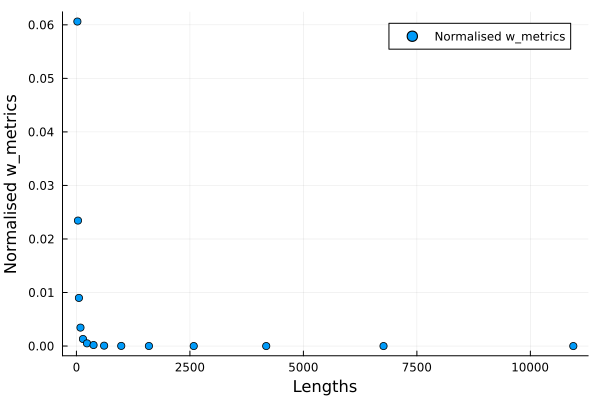

In [43]:
function calc_golden_length(exp_range::Vector{Int})
    phi = (1 + sqrt(5) ) / 2
    phi_conj = (1 - sqrt(5) ) / 2
    sequence_lengths = Int[]

    for g in exp_range
        length = real((phi^(g+2) - phi_conj^(g+2)) / sqrt(5))
        length = floor.(Int, length)
        push!(sequence_lengths, length)
    end

    return sequence_lengths
end

function calc_silver_length(n_range::Vector{Int})
    lengths = Int[]
    for n in n_range
        if n == 0
            push!(lengths, 1)
        elseif n == 1
            push!(lengths, 3)
        else
            L_prev_2, L_prev_1 = 1, 3
            for _ in 2:n
                L_current = 2 * L_prev_1 + L_prev_2
                L_prev_2, L_prev_1 = L_prev_1, L_current
            end
            push!(lengths, L_prev_1)
        end
    end
    return lengths
end

function calc_plastic_lengths(x_range::Vector{Int})
    lengths = Int[]
    for n in x_range
        sequence = "A"
        for _ in 1:n
            sequence = replace(sequence, "A" => "B", "B" => "AC", "C" => "A") # Van der Laan word generation
        end
        # println(typeof(sequence))
        number_sequence = [ch == 'A' ? 1 : ch == 'B' ? 2 : 3 for ch in sequence]
        length = size(number_sequence,1)
        push!(lengths, length)
    end
    return lengths
end

function compute_second_derivative(lengths::Vector{Int}, w_metrics::Vector{Float64})
    d_w_metric = diff(w_metrics) ./ diff(lengths)
    d2_w_metric = diff(d_w_metric) ./ diff(lengths[1:end-1])

    return d2_w_metric
end

function w_metric_calc(lengths::Vector{Int}, seq::String, t1::Float64, t2::Float64, t3::Float64)
    w_metrics = Float64[]
    norm_w_metrics = Float64[]

    for length in lengths
        c_qc = seq == "golden" ? golden_ratio_sequence_gen(length, t1, t2) :
               seq == "silver" ? silver_ratio_sequence_gen(length, t1, t2) :
               seq == "thue-morse" ? thue_morse_sequence_gen(length, t1, t2) :
               seq == "plastic" ? plastic_ratio_sequence_gen(length, t1, t2, t3) :
               println("Invalid QC type input. Use <golden>, <silver>, <thue_morse> or <plastic>")
        c_nc = normal_crystal_gen(length, t1)

        cum_c_qc = cumsum(c_qc)
        cum_c_nc = cumsum(c_nc)

        w_metric = sum(abs.(cum_c_qc - cum_c_nc)) #/ length
        norm_w_metric = w_metric / length^2

        push!(w_metrics, w_metric)
        push!(norm_w_metrics, norm_w_metric)
    end

    d2_w_metric = compute_second_derivative(lengths, w_metrics)

    return w_metrics, norm_w_metrics, d2_w_metric
end

g_range = floor.(Int, collect(range(6,19,14)))
s_range = floor.(Int, collect(range(3,10,10)))
golden_lengths = calc_golden_length(g_range)
silver_lengths = calc_silver_length(s_range)

t1=1.0
t2=2.0
t3=2.0

golden_w, golden_norm_w, golden_d2_w = w_metric_calc(golden_lengths, "golden", t1, t2, t3)
silver_w, silver_norm_w, silver_d2_w = w_metric_calc(silver_lengths, "silver", t1, t2, t3)

# Plots.scatter(
#     silver_lengths,
#     silver_w,
#     label="silver",
#     xlabel="lengths",
#     ylabel="normalised w metric",
#     size=(800,600)
# )

# Plots.scatter!(
#     golden_lengths,
#     golden_w,
#     label="golden"
# )

# function exponential_decay(x::Vector{Float64}, p::Vector{Float64})
#     return p[1] .* exp.(-p[2] .* x) .+ p[3]
# end

# function fit_exponential_decay(x_values::Vector{Int}, y_values::Vector{Float64})
#     x_values_float = Float64.(x_values)
#     model = exponential_decay
#     p0 = [maximum(y_values), 0.1, minimum(y_values)]
#     fit = LsqFit.curve_fit(model, x_values_float, y_values, p0)
#     return fit
# end

# function find_asymptote(x::Vector{Int}, values::Vector{Float64})
#     fit = fit_exponential_decay(x, values)
#     fit_params = fit.param

#     formatted_fit_params = map(x -> @sprintf("%.5f", x), fit_params)
#     # println("fit parameters: ", fit_params)
#     asymptote = fit_params[3]

#     fit_x_values = collect(range(minimum(x), maximum(x), 5*maximum(x)))
#     fitted_curve = exponential_decay(fit_x_values, fit_params)

#     return (fit_x_values, fitted_curve), asymptote
# end

# golden_fit, golden_asymptote = find_asymptote(golden_lengths, golden_norm_w)
# silver_fit, silver_asymptote = find_asymptote(silver_lengths, silver_norm_w)

# hline!([golden_asymptote], lc=:red, lw=1, label="golden asymptote = $(@sprintf("%.5f", golden_asymptote))", ls=:dash)
# hline!([silver_asymptote], lc=:blue, lw=1, label="silver asymptote = $(@sprintf("%.5f", silver_asymptote))", ls=:dash)

# Plots.plot!(
#     golden_fit[1],
#     golden_fit[2],
#     label="exponential fit (golden)"
# )
# Plots.plot!(
#     silver_fit[1],
#     silver_fit[2],
#     label="exponential fit (silver)"
# )


# Code to find the normalisation polynomial
function find_analytic_normalisation(lengths, w_metrics; degree=2)
    poly_fit = fit(lengths, w_metrics, degree)
    norm_function = x -> x ./ poly_fit.(x)

    return norm_function, poly_fit
end

normaliser, poly_fit = find_analytic_normalisation(golden_lengths, golden_w)
normalised_w_metrics = normaliser(golden_w)
println("Normalisation function: w_metric / (", poly_fit, ")")

Plots.scatter(
    golden_lengths,
    normalised_w_metrics,
    label="Normalised w_metrics",
    xlabel="Lengths",
    ylabel="Normalised w_metrics"
)

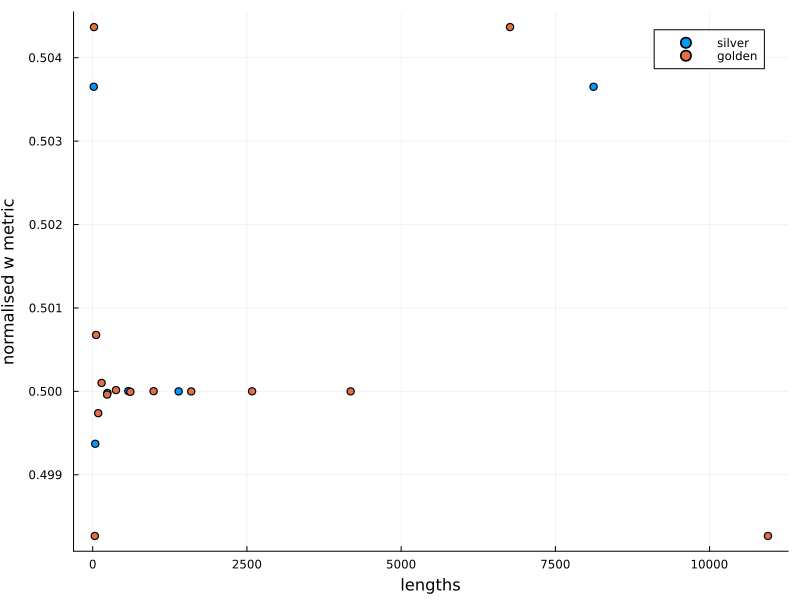

golden [0.5043674274443505, 0.49826597305588904, 0.500676313306071, 0.49973813724579813, 0.5001008220062001, 0.4999612955677423, 0.50001482878277, 0.4999943251737713, 0.5000021701087533, 0.49999917049542164, 0.5000003169830928, 0.49999987889000536]
silver: [NaN, 0.5036518199233717, 0.4993714965177509, NaN, NaN, 0.49998144236862146, 0.5000031850913452, 0.4999994534488967]


attempt to save state beyond implementation limit


In [ ]:
println("golden $golden_d2_w")
println("silver: $silver_d2_w")

function plot_derivates(silver_lengths, golden_lengths, silver_d2_w, golden_d2_w)
    plt = Plots.scatter(
        silver_lengths,
        silver_d2_w,
        label="silver",
        xlabel="lengths",
        ylabel="normalised w metric",
        size=(800,600)
    )

    Plots.scatter!(
        golden_lengths,
        golden_d2_w,
        label="golden"
    )
    display(plt)
end

plot_derivates(silver_lengths, golden_lengths, silver_d2_w, golden_d2_w)


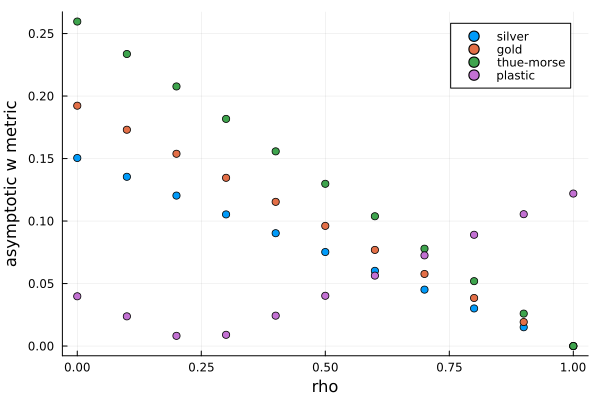

In [74]:
t2_range = collect(range(0.0, 1.0, 11))
golden_asymptotes = Float64[]
silver_asymptotes = Float64[]
thue_morse_asymptotes = Float64[]
plastic_asymptotes = Float64[]

g_range = floor.(Int, collect(range(1,20,20)))
s_range = floor.(Int, collect(range(1,11,11)))
tm_range = floor.(Int, collect(range(0,14,15)))
p_range = floor.(Int, collect(range(1,35,35)))
golden_lengths = calc_golden_length(g_range)
silver_lengths = calc_silver_length(s_range)
thue_morse_lengths = [2^i for i in tm_range]
plastic_lengths = calc_plastic_lengths(p_range)
# println(plastic_lengths)


for t2 in t2_range
    t1=1.0
    t2=t2
    t3=2.0

    _, golden_norm_w = w_metric_calc(golden_lengths, "golden", t1, t2, t3)
    _, silver_norm_w = w_metric_calc(silver_lengths, "silver", t1, t2, t3)
    _, thue_morse_norm_w = w_metric_calc(thue_morse_lengths, "thue-morse", t1, t2, t3)
    _, plastic_norm_w = w_metric_calc(plastic_lengths, "plastic", t1, t2, t3)

    _, golden_asymptote = find_asymptote(golden_lengths, golden_norm_w)
    _, silver_asymptote = find_asymptote(silver_lengths, silver_norm_w)
    _, thue_morse_asymptote = find_asymptote(thue_morse_lengths, thue_morse_norm_w)
    _, plastic_asymptote = find_asymptote(plastic_lengths, plastic_norm_w)


    push!(golden_asymptotes, golden_asymptote)
    push!(silver_asymptotes, silver_asymptote)
    push!(thue_morse_asymptotes, thue_morse_asymptote)
    push!(plastic_asymptotes, plastic_asymptote)
end

Plots.scatter(
    t2_range,
    silver_asymptotes,
    label="silver",
    xlabel="rho",
    ylabel="asymptotic w metric"
)

Plots.scatter!(
    t2_range,
    golden_asymptotes,
    label="gold"
)

Plots.scatter!(
    t2_range,
    thue_morse_asymptotes,
    label="thue-morse"
)

Plots.scatter!(
    t2_range,
    plastic_asymptotes,
    label="plastic"
)